# SPRINT 1: DATA EXPLORATION AND RESEARCH QUESTIONS

OBJETIVOS:

1. Cargar el dataset: código facilitado
2. Explorar el dataset: código facilitado
3. Normalizar la información: completar código
4. Plantear preguntas de investigación relevantes relacionadas con el aprendizaje no supervisado: completar texto
5. Reflexión final sobre técnicas de reducción de datos: completar texto





In [1]:
# import some libraries
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

# seaborn is a layer on top of matplotlib which has additional visualizations -
# just importing it changes the look of the standard matplotlib plots.
# the current version also shows some warnings which we'll disable.
import seaborn as sns
sns.set(style="white", color_codes=True)
import warnings
warnings.filterwarnings("ignore")

# show plots inline
%matplotlib inline

## 1.- Load Data





In [2]:
# get data and show some records

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# load dataset into Pandas DataFrame
data = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])


#data = data.drop('Id', axis=1) # get rid of the Id column - don't need it
data.sample(5)

,sepal length,sepal width,petal length,petal width,target
38,4.4,3.0,1.3,0.2,Iris-setosa
13,4.3,3.0,1.1,0.1,Iris-setosa
0,5.1,3.5,1.4,0.2,Iris-setosa
116,6.5,3.0,5.5,1.8,Iris-virginica
76,6.8,2.8,4.8,1.4,Iris-versicolor


Veamos si hay duplicados

In [3]:
data.duplicated().sum()

3

Veamos los registros de los duplicados

In [4]:
# Obtener los registros duplicados
duplicates = data[data.duplicated(keep=False)]

# Mostrar los registros duplicados
print(duplicates)

     sepal length  sepal width  petal length  petal width          target
9             4.9          3.1           1.5          0.1     Iris-setosa
34            4.9          3.1           1.5          0.1     Iris-setosa
37            4.9          3.1           1.5          0.1     Iris-setosa
101           5.8          2.7           5.1          1.9  Iris-virginica
142           5.8          2.7           5.1          1.9  Iris-virginica


Estos efectivmente podría ser gegistros duplicados o simplemente sucedio que que hubo coincidencia en las caracteristicas de los individuos lo cual es probable, así que solo mantengamoslo pressente por el momento y trabajaremos con todos los registros

## Análisis Descriptivo

### 2a.- Explore Data

Veamos la informacion general

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   target        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Separemos los datos en dos clases

In [6]:
# split data into features (X) and labels (y)
X = data.iloc[:,0:4]
y = data.iloc[:,-1]

print("\n Caracteristicas \n")
print(X.sample(5))
print("\n Target \n")
print(y.sample(5))


 Caracteristicas 

    sepal length  sepal width  petal length  petal width
91           6.1          3.0           4.6          1.4
21           5.1          3.7           1.5          0.4
67           5.8          2.7           4.1          1.0
48           5.3          3.7           1.5          0.2
78           6.0          2.9           4.5          1.5

 Target 

6         Iris-setosa
106    Iris-virginica
13        Iris-setosa
43        Iris-setosa
129    Iris-virginica
Name: target, dtype: object


Veamos los registros únicos de target

In [7]:
y.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

Veamos datos faltantes NaN

In [8]:
X.isnull().sum()


,0
sepal length,0
sepal width,0
petal length,0
petal width,0


Veamos si hay valores repetidos

In [9]:
X.duplicated().sum()

3

### 2b.- Visualize Data


Veamos si es un dataset balanceado

In [10]:
data["target"].value_counts()


,count
target,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


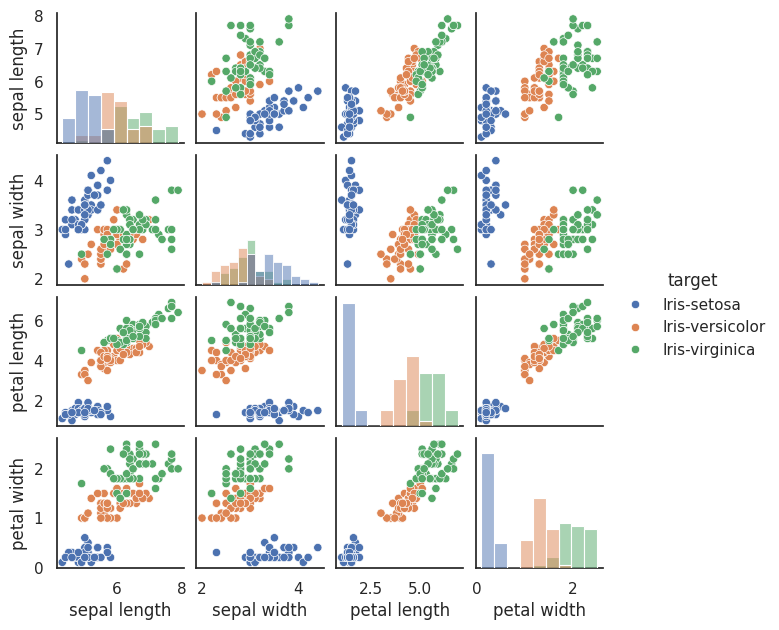

In [11]:
sns.pairplot(data, hue="target", diag_kind="hist", size=1.6);


Versicolor y Virginica son muy similares, sera muy dificil generar un algoritmo de clustering que las pueda separar, pero vamos a intentarlo!!



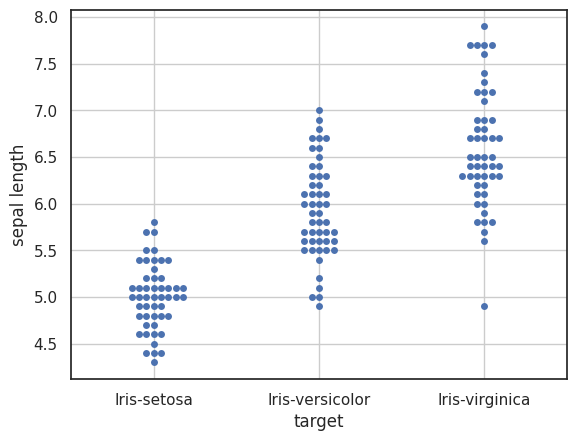

In [12]:
sns.swarmplot(x="target", y="sepal length", data=data)
plt.grid()

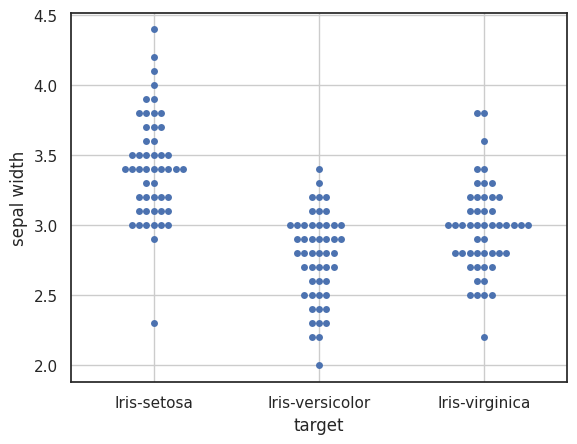

In [13]:
sns.swarmplot(x="target", y="sepal width", data=data)
plt.grid()

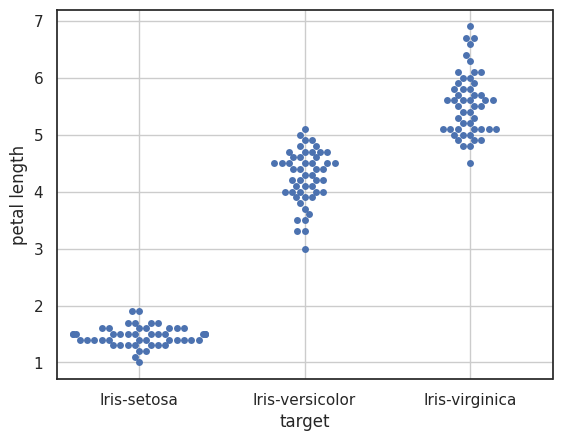

In [14]:
sns.swarmplot(x="target", y="petal length", data=data)
plt.grid()

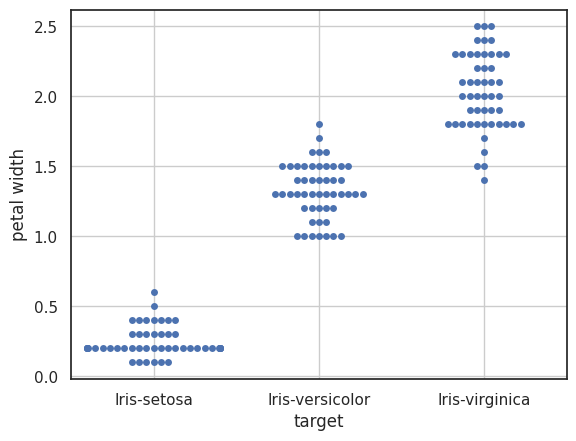

In [15]:
sns.swarmplot(x="target", y="petal width", data=data)
plt.grid()

Podemos observan que la caracterísca que mejor logra clasificar los datos es el petalo.

Veamos las estadíscas por categoría

In [16]:
X.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Veamos los rangos por categoría

In [17]:
X.groupby(y).agg([min, max])

sepal length      sepal width      petal length       \
                         min  max         min  max          min  max   
target                                                                 
Iris-setosa              4.3  5.8         2.3  4.4          1.0  1.9   
Iris-versicolor          4.9  7.0         2.0  3.4          3.0  5.1   
Iris-virginica           4.9  7.9         2.2  3.8          4.5  6.9   

                petal width       
                        min  max  
target                            
Iris-setosa             0.1  0.6  
Iris-versicolor         1.0  1.8  
Iris-virginica          1.4  2.5

Veamos ahora con más detalle cómo se distribuyen las caracteríscas del dataset

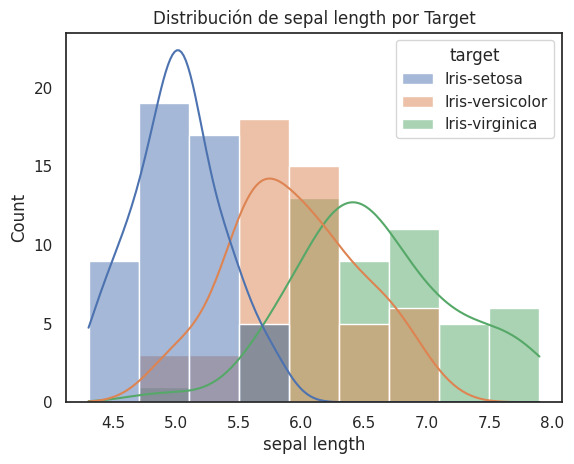

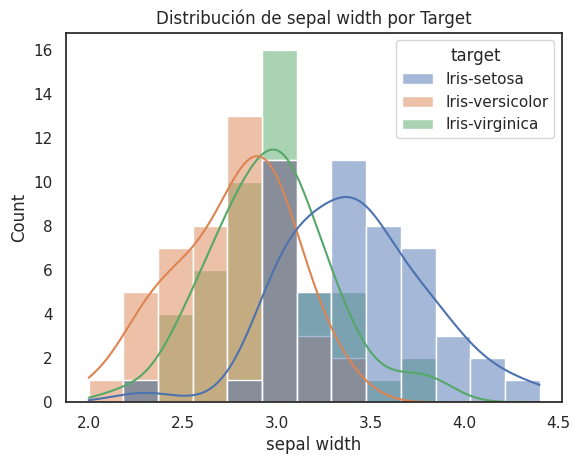

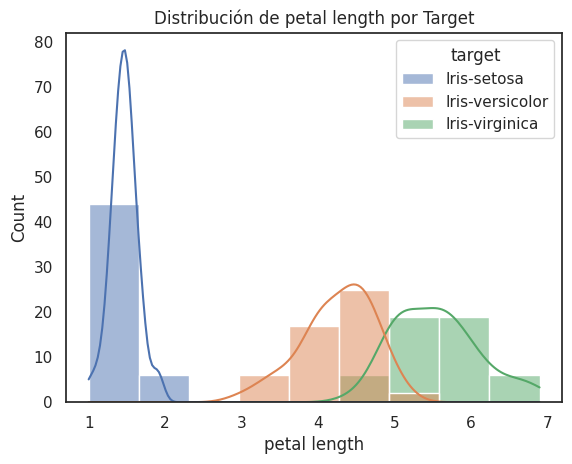

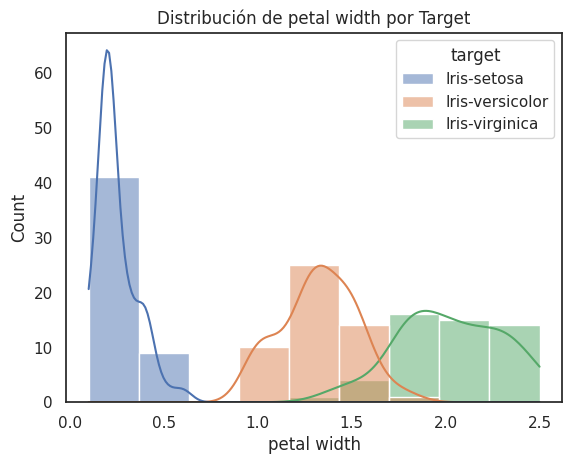

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

for feature in X.columns:
  sns.histplot(data=data, x=feature, hue='target', kde=True) # Se agrega hue='target'
  plt.title(f'Distribución de {feature} por Target')
  plt.show()

Analicemos la normalidad de las distribuciones.

Hagaoslo primero visualmente con gráficos Q-Q (Quantile-Quantile)

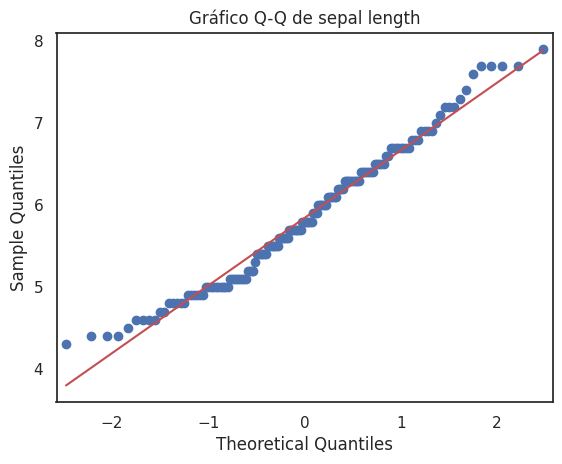

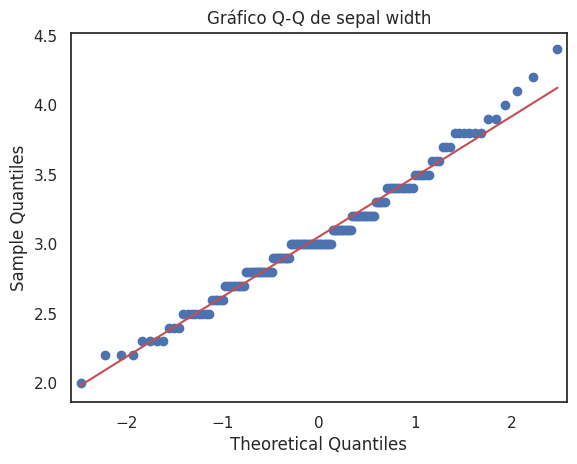

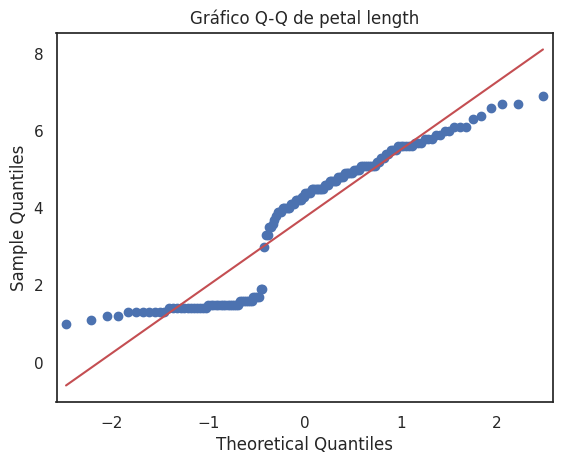

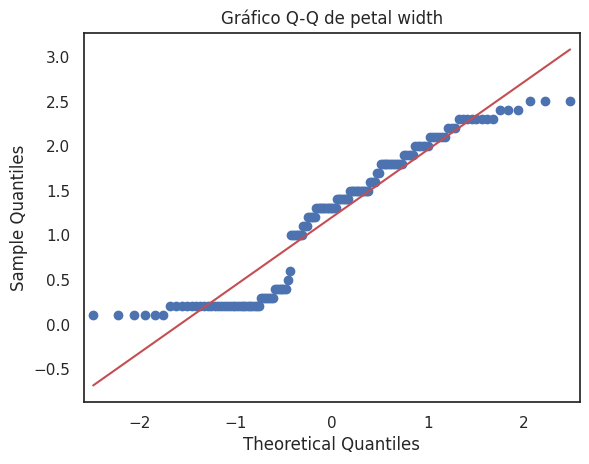

In [19]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

for feature in X.columns:
    sm.qqplot(X[feature], line='s')
    plt.title(f'Gráfico Q-Q de {feature}')
    plt.show()

In [20]:
from scipy import stats
import pandas as pd

# Asumiendo que X es tu DataFrame con las características
for feature in X.columns:
    # Prueba de Shapiro-Wilk
    shapiro_test = stats.shapiro(X[feature])
    print(f"Shapiro-Wilk test para {feature}: statistic={shapiro_test.statistic:.3f}, p-value={shapiro_test.pvalue:.3f}")

    # Prueba de Kolmogorov-Smirnov
    ks_test = stats.kstest(X[feature], 'norm')
    print(f"Kolmogorov-Smirnov test para {feature}: statistic={ks_test.statistic:.3f}, p-value={ks_test.pvalue:.3f}")
    print("-" * 30) # Separador para mejor legibilidad

Shapiro-Wilk test para sepal length: statistic=0.976, p-value=0.010
Kolmogorov-Smirnov test para sepal length: statistic=1.000, p-value=0.000
------------------------------
Shapiro-Wilk test para sepal width: statistic=0.984, p-value=0.075
Kolmogorov-Smirnov test para sepal width: statistic=0.979, p-value=0.000
------------------------------
Shapiro-Wilk test para petal length: statistic=0.876, p-value=0.000
Kolmogorov-Smirnov test para petal length: statistic=0.877, p-value=0.000
------------------------------
Shapiro-Wilk test para petal width: statistic=0.903, p-value=0.000
Kolmogorov-Smirnov test para petal width: statistic=0.540, p-value=0.000
------------------------------


Al analizar los gráficos y resultados anterior observamos que las características de dataset **no presenatn distrubuciones normales**, la que podría tener distribución normal es Sepal width segun la prueba de Shapiro-Wilk pero no es contundente de que sea.

Considero que es importante observar las dsitribuciones para luego tener una idea clara de que algoritmos de machine learning podemos aplicar y que sea con mayor efectivadad.

Analicemos ahora la dispersión y la presencia de valores atípicos

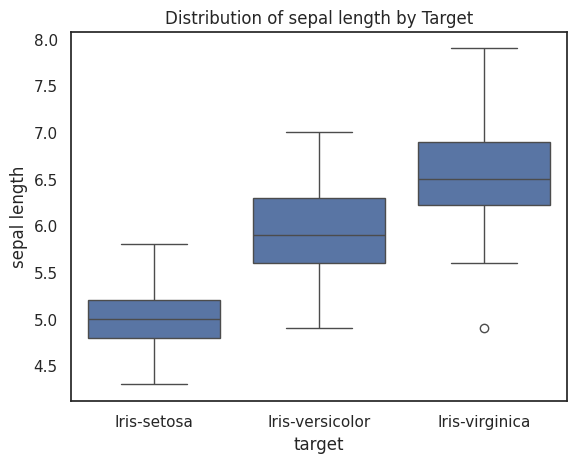

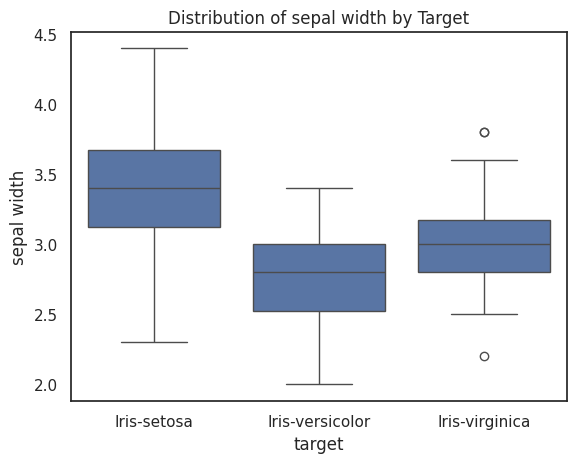

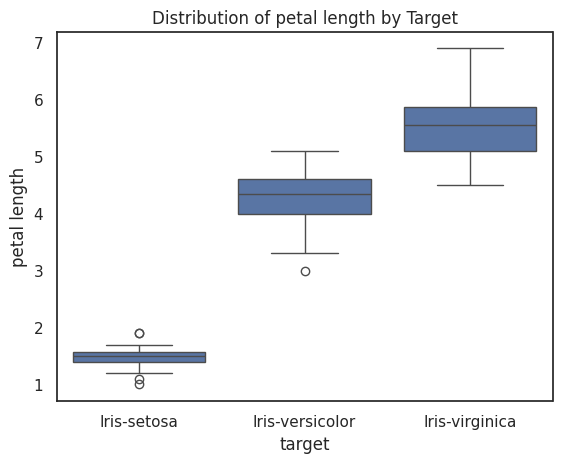

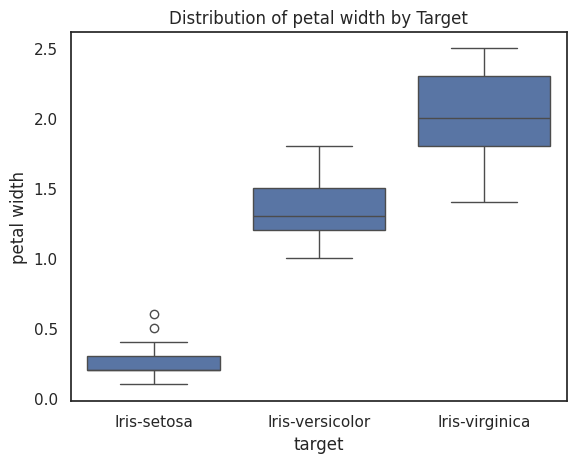

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

for feature in X.columns:
    sns.boxplot(x=y, y=feature, data=data)
    plt.title(f'Distribution of {feature} by Target')
    plt.show()

De las gráficas anteriores podemos ver que hay outliers en las categorias, veamos esto de forma más explícita

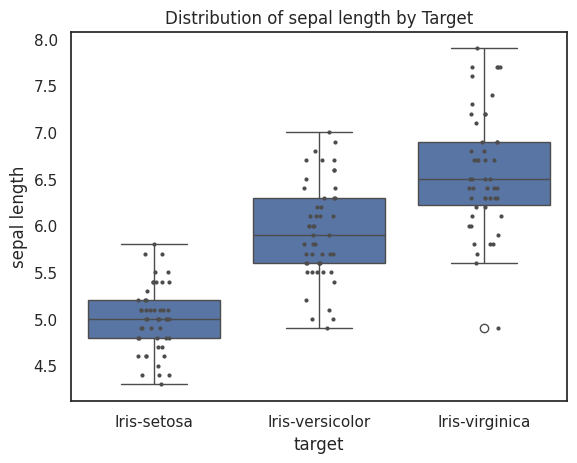

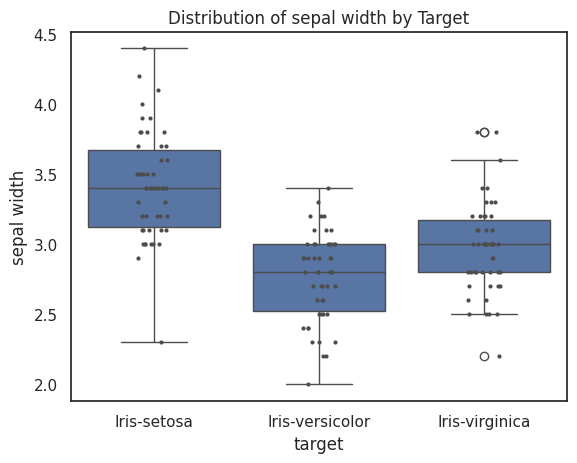

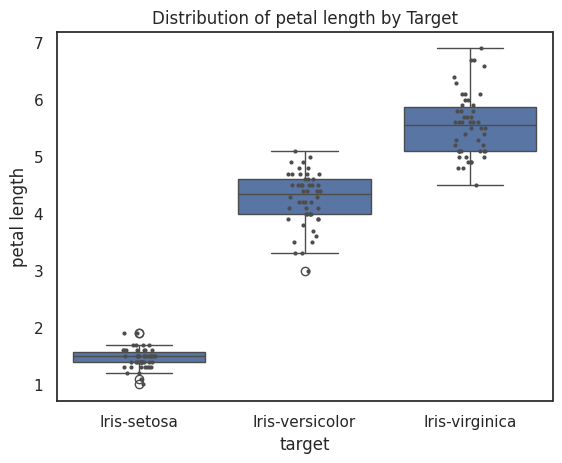

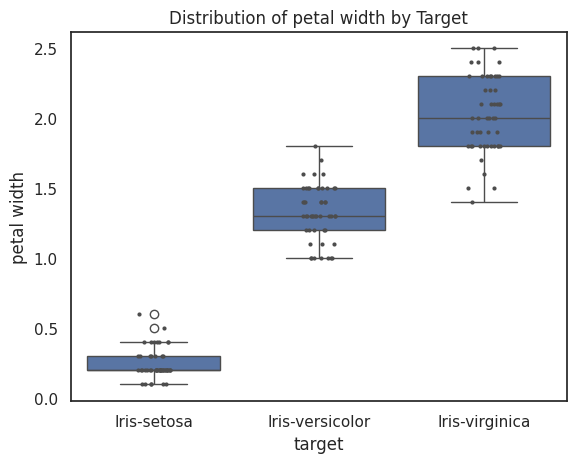

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

for feature in X.columns:
    sns.boxplot(x=y, y=feature, data=data)
    plt.title(f'Distribution of {feature} by Target')

    # Add data points to the plot to visualize outliers
    sns.stripplot(x=y, y=feature, data=data, color=".3", size=3)

    plt.show()

Contemos estos outliers

In [23]:
def detectar_y_contar_valores_atipicos(datos, caracteristica, objetivo):
    """Detecta y cuenta valores atípicos para una característica y categoría de objetivo específicas.

    Args:
        datos (pd.DataFrame): El dataframe de entrada.
        caracteristica (str): El nombre de la columna de la característica.
        objetivo (str): El nombre de la columna del objetivo.

    Returns:
        pd.DataFrame: Un dataframe que contiene los conteos y valores de los valores atípicos.
    """

    conteos_valores_atipicos = {}  # Diccionario para almacenar los conteos de valores atípicos por categoría
    valores_valores_atipicos = {}  # Diccionario para almacenar los valores de los valores atípicos por categoría

    for categoria in datos[objetivo].unique():  # Iterar a través de cada categoría única en la columna objetivo
        datos_categoria = datos[datos[objetivo] == categoria][caracteristica]  # Obtener los datos de la característica para la categoría actual

        Q1 = datos_categoria.quantile(0.25)  # Calcular el primer cuartil (Q1)
        Q3 = datos_categoria.quantile(0.75)  # Calcular el tercer cuartil (Q3)
        IQR = Q3 - Q1  # Calcular el rango intercuartil (IQR)
        limite_inferior = Q1 - 1.5 * IQR  # Calcular el límite inferior para valores atípicos
        limite_superior = Q3 + 1.5 * IQR  # Calcular el límite superior para valores atípicos

        valores_atipicos = datos_categoria[(datos_categoria < limite_inferior) | (datos_categoria > limite_superior)]  # Identificar valores atípicos
        conteos_valores_atipicos[categoria] = len(valores_atipicos)  # Almacenar el conteo de valores atípicos para la categoría
        valores_valores_atipicos[categoria] = valores_atipicos.tolist()  # Almacenar los valores de los valores atípicos para la categoría

    return pd.DataFrame({'Conteo de valores atípicos': conteos_valores_atipicos, 'Valores atípicos': valores_valores_atipicos})  # Devolver un dataframe con los resultados


# Iterar a través de cada característica y detectar valores atípicos para cada categoría de objetivo
for caracteristica in X.columns:
    df_valores_atipicos = detectar_y_contar_valores_atipicos(data, caracteristica, 'target')  # Llamar a la función para obtener información sobre valores atípicos
    print(f"Valores atípicos para {caracteristica}:\n{df_valores_atipicos}\n")  # Imprimir los resultados para cada característica

Valores atípicos para sepal length:
                 Conteo de valores atípicos Valores atípicos
Iris-setosa                               0               []
Iris-versicolor                           0               []
Iris-virginica                            1            [4.9]

Valores atípicos para sepal width:
                 Conteo de valores atípicos Valores atípicos
Iris-setosa                               0               []
Iris-versicolor                           0               []
Iris-virginica                            3  [3.8, 2.2, 3.8]

Valores atípicos para petal length:
                 Conteo de valores atípicos      Valores atípicos
Iris-setosa                               4  [1.1, 1.0, 1.9, 1.9]
Iris-versicolor                           1                 [3.0]
Iris-virginica                            0                    []

Valores atípicos para petal width:
                 Conteo de valores atípicos Valores atípicos
Iris-setosa                               

Impacto en el PCA:

* Dado que solo son un 7% de los datos, no deberían tener un impacto tan devastador, pero aún así podrían afectar los primeros componentes principales, que son los que suelen capturar la mayor parte de la varianza.

Eventualmente podemos intentar hacer un análisis PCA tanto con los outliers como sin ellos y comparar los resultados. Si la eliminación de los outliers no cambia significativamente la varianza explicada por los componentes principales, puede que no sea necesario eliminarlos. Pero si la varianza explicada por los primeros componentes no cambia mucho, eso sugiere que los outliers no están influyendo fuertemente en la estructura general del modelo, y podrías dejarlos.

De forma alternativa podríamos usar un PCA robusto, así no eliminamos los outliers pero mitigamos su impacto.

## 3.- Feature Scaling
Los datos estan desbalanceados por ejemplo Sepal Lenght es aproximadamente 4 veces mas grande que Petal Width, por lo tando recomiendo escalar los valores. de lo contrario, las características más grandes dominarán a las demás en la agrupación, etc.

In [24]:
from sklearn import preprocessing

# Crear un objeto StandardScaler
scaler = preprocessing.StandardScaler() # Crea una instancia de StandardScaler para escalar datos.

#INCORPORAR AQUI LAS LINEAS FALTANTES PARA GENERAR UN DATASET CON LAS CARACTERISITCAS ESCALADAS
X_scaled_array = scaler.fit_transform(X) # Ajustamos el scaler a los datos (X) y luego los transformamos.

# Crea un DataFrame de Pandas con los datos escalados.
X_scaled = pd.DataFrame(X_scaled_array, columns = X.columns)

# Muestra una muestra aleatoria de 10 filas del DataFrame escalado.
X_scaled.sample(10)

,sepal length,sepal width,petal length,petal width
123,0.553333,-0.819166,0.649027,0.790591
105,2.128516,-0.124958,1.615744,1.185010
20,-0.537178,0.800654,-1.170675,-1.312977
103,0.553333,-0.356361,1.047087,0.790591
117,2.249683,1.726266,1.672610,1.316483
30,-1.264185,0.106445,-1.227541,-1.312977
112,1.159173,-0.124958,0.990221,1.185010
131,2.492019,1.726266,1.502013,1.053537
130,1.886180,-0.587764,1.331416,0.922064
29,-1.385353,0.337848,-1.227541,-1.312977


Veamos las correlaciones

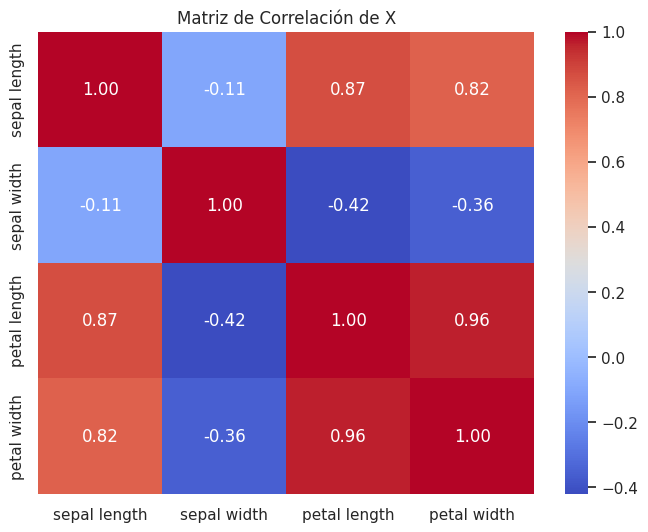

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcula la matriz de correlación
corr_matrix = X.corr()

# Crea el mapa de calor
plt.figure(figsize=(8, 6))  # Ajusta el tamaño de la figura si es necesario
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación de X')
plt.show()

##4.- Research questions

--------------------------------------------------------------------
INCORPORA AQUI LAS PREGUNTAS DE INVESTIGACIÓN




--------------------------------------------------------------------

### PREGUNTAS DE INVESTIGACIÓN

## 1. Marketing y Comportamiento del Consumidor
- **¿Cómo se pueden agrupar los clientes en segmentos con comportamientos de compra similares?**  
  - Técnica: **Clustering (por ejemplo, K-means, DBSCAN)**.
  
- **¿Qué patrones de actividad en redes sociales pueden predecir la propagación de desinformación o noticias virales sin supervisión explícita?**  
  - Técnica: **Detección de anomalías y clustering de redes sociales**.

- **¿Qué características o grupos de productos están correlacionados de manera inesperada en un conjunto de datos de ventas?**  
  - Técnica: **Análisis de agrupamientos (Clustering)** o **Análisis de asociación (por ejemplo, Algoritmo Apriori)**.

- **¿Qué patrones comunes de comportamiento muestran los usuarios de una plataforma de redes sociales sin usar información etiquetada?**  
  - Técnica: **Clustering y reducción de dimensionalidad (por ejemplo, t-SNE o UMAP)**.

---

## 2. Ciencias de la Computación y Tecnologías Emergentes
- **¿Cómo se pueden identificar patrones emergentes en la propagación de qubits en circuitos cuánticos complejos para mejorar la eficiencia de algoritmos cuánticos?**  
  - Técnica: **Clustering de comportamientos cuánticos y análisis de correlación cuántica**.
  
- **¿Qué configuraciones de circuitos cuánticos no etiquetados pueden optimizar el entrelazamiento cuántico para mejorar la fidelidad de las simulaciones cuánticas sin un conjunto de datos previamente etiquetados?**  
  - Técnica: **Algoritmos de optimización no supervisados y aprendizaje automático cuántico**.
  
- **¿Cómo se agrupan los distintos tipos de comportamientos en sistemas autónomos como vehículos autoconducidos o robots, basándose solo en datos sensoriales no etiquetados?**  
  - Técnica: **Clustering y aprendizaje no supervisado en datos de sensores**.

---

## 3. Materiales y Nanotecnología
- **¿Cómo se pueden descubrir nuevas clases de materiales con propiedades específicas (como superconductores a temperatura ambiente) a partir de grandes bases de datos de estructuras cristalinas sin etiquetas previas?**  
  - Técnica: **Clustering de estructuras atómicas y análisis de características materiales mediante redes neuronales o técnicas de reducción de dimensionalidad**.
  
- **¿Qué combinaciones no evidentes de elementos químicos podrían resultar en nuevos materiales con propiedades ópticas o electrónicas específicas, identificadas sin intervención de expertos?**  
  - Técnica: **Modelado de características de materiales y clustering de propiedades usando redes neuronales o técnicas de reducción de dimensionalidad**.
  
- **¿Qué características estructurales emergen en los materiales descubiertos que pueden ser aprovechadas para la creación de nuevos materiales con aplicaciones en nanotecnología?**  
  - Técnica: **Clustering y análisis de propiedades materiales utilizando métodos de reducción de dimensionalidad**.

---

## 4. Salud y Biomedicina
- **¿Cómo se pueden identificar nuevas subcategorías de enfermedades o síndromes emergentes a partir de la agrupación de síntomas reportados en grandes volúmenes de datos médicos no etiquetados?**  
  - Técnica: **Modelado de temas y clustering de texto médico no estructurado**.

- **¿Cómo se pueden identificar y analizar los diferentes patrones de consumo de energía en una ciudad a lo largo del tiempo?**  
  - Técnica: **Clustering de series temporales (por ejemplo, clustering jerárquico o K-means)**.

- **¿Qué factores emergentes contribuyen a la formación de comunidades y subculturas dentro de plataformas de streaming de video (como YouTube o Twitch) utilizando interacciones y contenido no etiquetado?**  
  - Técnica: **Análisis de redes y modelado de temas**.

---

## 5. Redes Sociales y Comunicaciones
- **¿Qué patrones de cooperación y conflicto en grupos de trabajo basados en interacciones de comunicación (por ejemplo, correos electrónicos, mensajes de chat) en grandes organizaciones?**  
  - Técnica: **Análisis de redes sociales y clustering basado en texto**.
  
- **¿Cómo se pueden detectar patrones de interacción y comunidades dentro de plataformas de streaming de video como YouTube o Twitch?**  
  - Técnica: **Análisis de redes sociales y modelado de comunidad**.

- **¿Qué factores emergentes contribuyen a la formación de comunidades y subculturas dentro de plataformas de streaming de video (como YouTube o Twitch) utilizando interacciones y contenido no etiquetado?**  
  - Técnica: **Análisis de redes y modelado de temas**.

---

## 6. Análisis de Datos y Reducción de Dimensionalidad
- **¿Qué características subyacentes generan variabilidad en los datos de una encuesta de satisfacción del cliente?**  
  - Técnica: **Análisis de componentes principales (PCA)**.

- **¿Cuáles son las relaciones no observadas entre diferentes variables en un conjunto de datos de salud (por ejemplo, mediciones de presión arterial, colesterol y glucosa)?**  
  - Técnica: **Análisis de componentes principales (PCA) o Análisis de Factores**.

- **¿Qué características o grupos de productos están correlacionados de manera inesperada en un conjunto de datos de ventas?**  
  - Técnica: **Análisis de agrupamientos (Clustering)** o **Análisis de asociación (por ejemplo, Algoritmo Apriori)**.

---

## 7. Sostenibilidad y Energía
- **¿Cómo se pueden identificar y analizar los diferentes patrones de consumo de energía en una ciudad a lo largo del tiempo?**  
  - Técnica: **Clustering de series temporales (por ejemplo, clustering jerárquico o K-means)**.

- **¿Qué patrones de movilidad humana se pueden identificar en datos de dispositivos móviles para predecir la propagación de enfermedades infecciosas sin depender de modelos supervisados tradicionales?**  
  - Técnica: **Clustering geoespacial y análisis de redes de movilidad**.

- **¿Qué patrones de consumo energético no detectados se pueden descubrir en redes de energía inteligentes para optimizar la distribución sin intervención humana?**  
  - Técnica: **Clustering de series temporales y análisis de datos de sensores en tiempo real**.

---

## 8. Biodiversidad Animal y Cambio Climático
- **¿Cómo pueden los cambios en la temperatura y otros factores climáticos afectar la migración y los patrones de comportamiento de especies animales en áreas específicas?**  
  - Técnica: **Clustering geoespacial y análisis de series temporales de datos ambientales**.

- **¿Qué patrones en los datos de biodiversidad pueden predecir la extinción o el riesgo de especies debido al cambio climático sin etiquetado explícito de los datos?**  
  - Técnica: **Clustering y análisis de patrones en grandes bases de datos de especies animales y sus hábitats**.

- **¿Cómo se pueden identificar nuevas áreas críticas para la conservación de la biodiversidad basadas en la variabilidad climática y la distribución de especies?**  
  - Técnica: **Análisis de datos espaciales y clustering de hábitats utilizando datos ambientales**.

- **¿Qué factores climáticos emergentes están correlacionados con la disminución de poblaciones de especies en peligro de extinción sin la necesidad de etiquetas previas?**  
  - Técnica: **Modelado de correlaciones y reducción de dimensionalidad en datos ecológicos y climáticos**.

---

## 9. Educación
- **¿Cómo se pueden identificar patrones de aprendizaje en estudiantes utilizando datos de interacción con plataformas de aprendizaje en línea sin intervención de un experto?**  
  - Técnica: **Clustering de comportamientos de aprendizaje y análisis de redes de estudiantes**.

- **¿Cuáles son los factores que influyen en el rendimiento académico de los estudiantes al interactuar con materiales educativos digitalizados y recursos en línea?**  
  - Técnica: **Análisis de series temporales y reducción de dimensionalidad en datos educativos**.

- **¿Cómo pueden las interacciones entre estudiantes en plataformas de colaboración (como foros o grupos de estudio en línea) predecir el éxito en la resolución de tareas académicas?**  
  - Técnica: **Análisis de redes sociales y clustering de interacciones**.

- **¿Qué grupos de estudiantes muestran patrones de aprendizaje similares en diversas asignaturas o actividades académicas, y cómo pueden ser optimizados los recursos para mejorar su rendimiento?**  
  - Técnica: **Clustering y análisis de rendimiento académico**.

- **¿Qué factores no observados contribuyen a la deserción escolar o abandono de los estudios en plataformas de aprendizaje digital?**  
  - Técnica: **Análisis de anomalías y clustering en datos de interacciones y comportamiento en línea**.





## 5.- Reducción de Dimensionalidad

### PCA (Principal Component Analysis)

**Implementación**  

In [26]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

principalDf.head()

,principal component 1,principal component 2
0,-2.684207,0.326607
1,-2.715391,-0.169557
2,-2.889820,-0.137346
3,-2.746437,-0.311124
4,-2.728593,0.333925


**DataFrame de Componentes Principales obtenidos con PCA con la variable objetivo `target`.**

In [27]:
finalDf = pd.concat([principalDf, data[['target']]], axis = 1)
finalDf.head()

,principal component 1,principal component 2,target
0,-2.684207,0.326607,Iris-setosa
1,-2.715391,-0.169557,Iris-setosa
2,-2.889820,-0.137346,Iris-setosa
3,-2.746437,-0.311124,Iris-setosa
4,-2.728593,0.333925,Iris-setosa


**Visualización de un  gráfico de dispersión (scatter plot) que muestra los datos del dataset Iris proyectados en las dos primeras componentes principales obtenidas con PCA.**

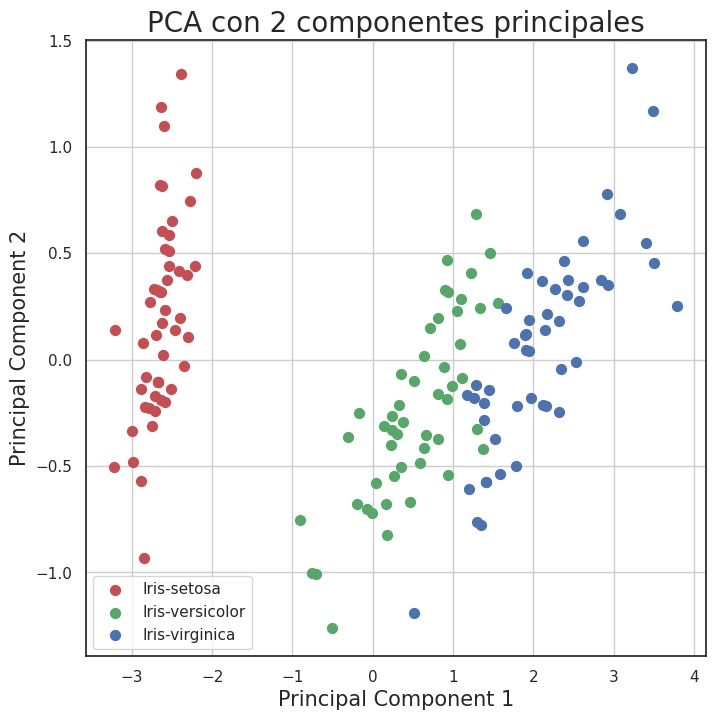

In [28]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('PCA con 2 componentes principales', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

Proporción de la varianza explicada por cada componente principal.

In [29]:
pca.explained_variance_ratio_

array([0.92461621, 0.05301557])

**Total de Varianza Explicada**

In [30]:
total_variance = np.sum(pca.explained_variance_ratio_)
print(f"Total de Varianza Explicada: {total_variance * 100:.2f}%")

Total de Varianza Explicada: 97.76%


**A continuacion generamos un grafico denominado LOADING PLOT para entender la importancia de cada variable en los componentes principales.**

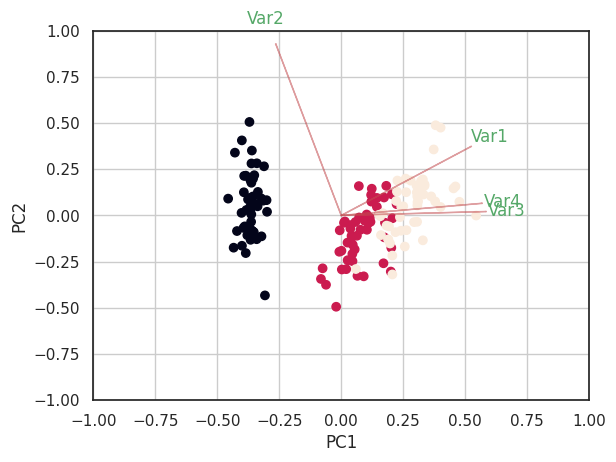

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Eescalamos los datos antes del PCA.
scaler = StandardScaler()
scaler.fit(X)
X=scaler.transform(X)
pca = PCA()
x_new = pca.fit_transform(X)

def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())

    # Etiquetamos a valores numéricos para la asignación de colores
    target_labels = y.unique()
    color_mapping = {label: i for i, label in enumerate(target_labels)}
    color_indices = [color_mapping[label] for label in y]

    plt.scatter(xs * scalex,ys * scaley, c = color_indices)  # Usamos color_indices para el color

    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

# Utilizamos la función myplot para las 2 componentes principales.
myplot(x_new[:,0:2],np.transpose(pca.components_[0:2, :]))
plt.show()

### t-SNE (t-Distributed Stochastic Neighbor Embedding)

In [32]:
# Importamos t-SNE
from sklearn.manifold import TSNE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


# Aplicamos t-SNE
tsne = TSNE(n_components=2, random_state=28)  # Usamos 2 dimensiones para visualización
X_tsne = tsne.fit_transform(X_scaled)

# Convertimos a DataFrame para su manipulación
tsne_df = pd.DataFrame(data=X_tsne, columns=['t-SNE 1', 't-SNE 2'])
tsne_df['target'] = y
tsne_df.head()



,t-SNE 1,t-SNE 2,target
0,-25.699791,-0.439400,Iris-setosa
1,-21.746485,-0.807766,Iris-setosa
2,-22.975805,0.148431,Iris-setosa
3,-22.169785,0.283558,Iris-setosa
4,-26.242918,0.118761,Iris-setosa


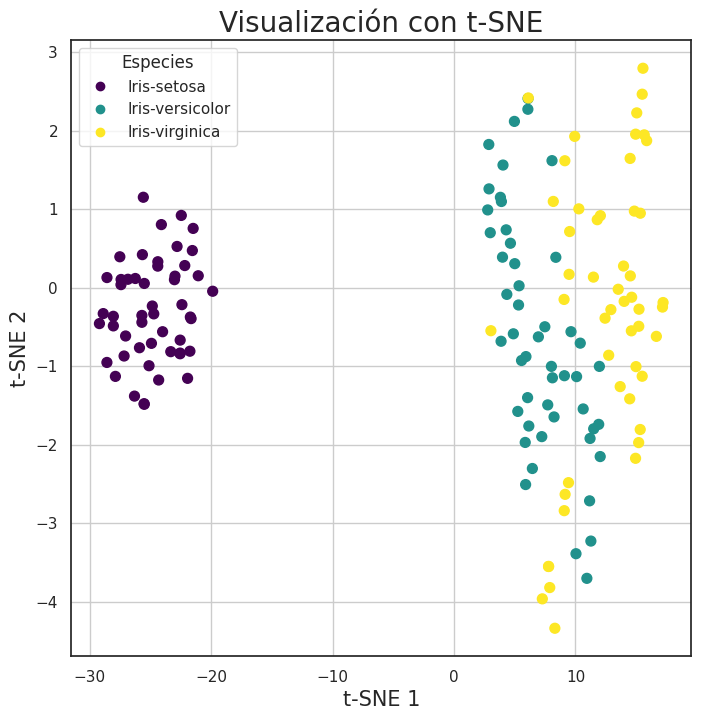

In [33]:
# Especies en el dataset Iris
targets = [0, 1, 2]  # Usamos los índices numéricos correspondientes a las especies
target_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']  # Nombres de las especies
colors = ['r', 'g', 'b']

# Creamos un diccionario para asignar nombres de destino a valores numéricos
target_mapping = {name: i for i, name in enumerate(target_names)}
# Aplicamos la asignación a la columna 'target' (asegúrate de que tsne_df['target'] tenga los valores numéricos)
tsne_df['target_num'] = tsne_df['target'].map(target_mapping)

# Graficamos los puntos y los colores según las especies
plt.figure(figsize=(8, 8))
scatter = plt.scatter(tsne_df['t-SNE 1'], tsne_df['t-SNE 2'], c=tsne_df['target_num'], cmap='viridis', s=50)

# Añadimos la leyenda y etiquetas
plt.xlabel('t-SNE 1', fontsize=15)
plt.ylabel('t-SNE 2', fontsize=15)
plt.title('Visualización con t-SNE', fontsize=20)

# Añadimos la leyenda utilizando el mapeo de colores
handles, labels = scatter.legend_elements()
plt.legend(handles, target_names, title="Especies")

plt.grid(True)

# Mostramos el gráfico
plt.show()


### UMAP (Uniform Manifold Approximation and Projection)

**Hiperarámetros de UMAP**:

`n_neighbors`=50: Es el número de vecinos utilizados para calcular la distancia. Afecta la estructura local.

`min_dist=0.1`: Controla la dispersión de los puntos en el espacio proyectado. Valores más bajos agrupan más los puntos.

`n_components=2`: Para visualización en 2D.

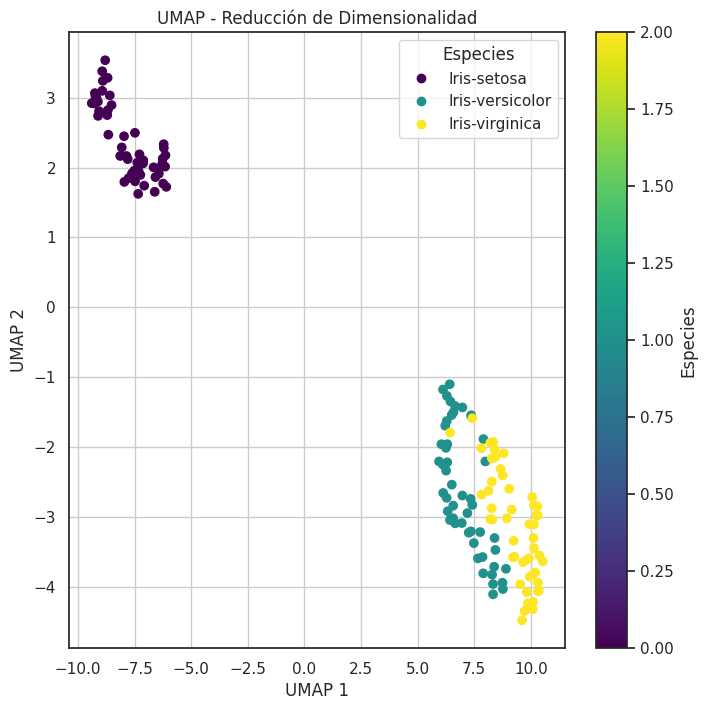

In [34]:
import umap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

# Aplicar UMAP
umap_model = umap.UMAP(n_neighbors=50, min_dist=0.1, n_components=2, random_state=28)  # 2 dimensiones para visualización
X_umap = umap_model.fit_transform(X_scaled)

# Convertir a DataFrame para manipulación
umap_df = pd.DataFrame(data=X_umap, columns=['UMAP 1', 'UMAP 2'])
umap_df['target'] = y

# Visualizar la proyección en 2D
plt.figure(figsize=(8, 8))

# ----> CHANGE: Map target names to numerical values for color mapping
target_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
# Create a dictionary mapping target names to numerical values
target_mapping = {name: i for i, name in enumerate(target_names)}
# Apply the mapping to the 'target' column
umap_df['target_num'] = umap_df['target'].map(target_mapping)


# ----> CHANGE: Use numerical target values for color mapping
scatter = plt.scatter(umap_df['UMAP 1'], umap_df['UMAP 2'], c=umap_df['target_num'], cmap='viridis')

# Añadir la leyenda
handles, labels = scatter.legend_elements()
plt.legend(handles, target_names, title="Especies")

# Títulos y etiquetas
plt.title('UMAP - Reducción de Dimensionalidad')
plt.colorbar(label='Especies')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.grid(True)
plt.show()

#### Análisis de los resultados

**Silhouette Score**

El **Silhouette Score** es una métrica utilizada para evaluar la calidad de los grupos o clusters en un conjunto de datos después de haber sido agrupados o proyectados en un espacio reducido. En el contexto de la reducción de dimensionalidad, como en el caso de PCA, t-SNE y UMAP, el **Silhouette Score** mide cuán bien separados están los puntos de diferentes clases (o grupos) y cuán coherentes son los puntos dentro de un mismo grupo.

##### Cálculo del Silhouette Score

Para un punto $i$, el **Silhouette Score** $s(i)$ se calcula usando dos componentes:

1. **Cohesión**: Es la media de las distancias entre el punto $i$ y todos los demás puntos dentro del mismo cluster (grupo). Se denota como $a(i)$.  
   Cuanto más bajo sea $a(i)$, mejor será la cohesión del grupo para el punto $i$.

2. **Separación**: Es la distancia media entre el punto $i$ y todos los puntos en el cluster más cercano que no incluye al punto $i$. Se denota como $b(i)$.  
   Cuanto mayor sea $b(i)$, mejor será la separación entre los grupos.

El **Silhouette Score** para un punto $i$ se calcula de la siguiente manera:

$$
s(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}
$$

- Si $s(i)$ está cerca de **1**, significa que el punto está bien agrupado.
- Si $s(i)$ está cerca de **0**, significa que el punto está en el borde de dos clusters.
- Si $s(i)$ está cerca de **-1**, significa que el punto probablemente está mal agrupado.

El **Silhouette Score** global se calcula como el promedio de los **Silhouette Scores** de todos los puntos en el conjunto de datos.


In [35]:
from sklearn.manifold import TSNE
import umap
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors

# Aplicamos PCA, UMAP y t-SNE
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

tsne = TSNE(n_components=2, random_state=28)
X_tsne = tsne.fit_transform(X_scaled)

umap_model = umap.UMAP(n_neighbors=50, min_dist=0.1, n_components=2, random_state=28)
X_umap = umap_model.fit_transform(X_scaled)

# Calcular el Silhouette Score
pca_silhouette = silhouette_score(X_pca, y)
tsne_silhouette = silhouette_score(X_tsne, y)
umap_silhouette = silhouette_score(X_umap, y)

print(f"Silhouette Score PCA: {pca_silhouette}")
print(f"Silhouette Score t-SNE: {tsne_silhouette}")
print(f"Silhouette Score UMAP: {umap_silhouette}")



Silhouette Score PCA: 0.4002742894857172
Silhouette Score t-SNE: 0.49620091915130615
Silhouette Score UMAP: 0.5402083992958069



* **Silhouette Score PCA: $0.40$**

Un Silhouette Score de $0.40$ para PCA indica que los puntos están moderadamente bien agrupados, pero no de forma excelente. Un valor cercano a $0.5$ sería más deseable, lo que implicaría una mayor separación entre los clusters. Este valor sugiere que la reducción de dimensionalidad usando PCA no logra crear una separación clara entre las clases de manera efectiva. Aunque es aceptable, hay margen de mejora, y los datos no están perfectamente estructurados en el espacio reducido.

* **Silhouette Score t-SNE: $0.50$**

Un Silhouette Score de $0.50$ para t-SNE indica una separación moderadamente buena entre los grupos. Aunque la separación no es perfecta, el valor sugiere que t-SNE ha logrado una representación efectiva de las relaciones locales entre los puntos en el espacio reducido. Este valor es mejor que el de PCA y muestra que t-SNE ha preservado las relaciones más cercanas entre los datos, lo que es la principal ventaja de esta técnica no lineal. Sin embargo, un valor más cercano a $0.6$ o superior indicaría una separación aún más clara entre los clusters.

* **Silhouette Score UMAP: $0.54$**

Un Silhouette Score de $0.54$ para UMAP sugiere que UMAP ha logrado una separación clara y relativamente buena entre los grupos en el espacio reducido. Este valor es ligeramente superior al de t-SNE y demuestra que UMAP, al igual que t-SNE, ha preservado las relaciones locales de los datos. El valor de $0.54$ indica que UMAP ha sido capaz de encontrar una representación que mejora la separación de los clusters, y como t-SNE, ha realizado un trabajo efectivo en mantener las relaciones locales. Además, UMAP tiene la ventaja de ser más eficiente computacionalmente que t-SNE y puede manejar datos más grandes sin perder efectividad.



#### Conclusión:

* **PCA**: El resultado de $0.40$ sugiere que la reducción lineal de dimensionalidad utilizando PCA no fue completamente exitosa en separar los grupos. Aunque el valor es aceptable, la estructura de los datos no está completamente clara.

* **t-SNE**: Con un Silhouette Score de $0.50$, t-SNE muestra una separación más clara que PCA, lo que indica que ha sido más efectivo en preservar la estructura local de los datos en el espacio reducido. Aunque hay espacio para una mejora, el valor es bastante prometedor.

* **UMAP**: UMAP, con un Silhouette Score de $0.54$, ofrece una excelente representación de los datos, similar a t-SNE, pero con la ventaja adicional de ser más rápido y eficiente. Ha logrado una separación efectiva entre los grupos, ligeramente superior a la de t-SNE.



## 6.- Reflexión final técnicas de reducción de dimensionalidad

---------------------------------------------------
INCORPORA AQUÍ TU REFLEXIÓN SOBRE ESTE PUNTO




----------------------------------------------------

### Reflexión final: Influencia de las características del dataset en la elección de técnicas de reducción de dimensionalidad

Al analizar el **dataset Iris**, que contiene información sobre las características de tres especies de flores de Iris (como el largo y ancho de los sépalos y los pétalos), y al considerar tanto los **resultados del análisis exploratorio** como los **resultados del análisis de linealidad** y la observación de que las distribuciones de las características son **no lineales**, se puede reflexionar sobre cómo estas características influyen en la elección entre técnicas de reducción de dimensionalidad **lineales** y **no lineales**. Reflexionemos sobre cómo estas características afectan la selección de las herramientas adecuadas.

#### **Técnicas lineales (como PCA)**

**1. Relaciones entre variables:**
- En el análisis exploratorio, se ha observado que algunas características del dataset Iris, como **"petal length"** y **"petal width"**, presentan una **correlación lineal moderada a alta** (0.96). Esto sugiere que **parte de las relaciones** en el dataset podrían ser lineales. Sin embargo, al analizar la **distribución de las características**, es evidente que algunas distribuciones, como las de **"sepal length"** y **"sepal width"**, presentan una estructura no lineal o más dispersa, lo que indica que las relaciones no son estrictamente lineales en todo el dataset.

**2. Beneficios de PCA:**
- **Reducción de dimensionalidad inicial**: El PCA busca encontrar combinaciones lineales de las características que maximicen la varianza en los datos. Si bien PCA es adecuado para capturar relaciones lineales, la **presencia de relaciones no lineales** puede limitar su capacidad para identificar correctamente estructuras complejas, especialmente cuando las distribuciones de las características no son simétricas ni gaussianas.
  
- **Eliminación de redundancia**: Dado que algunas características están correlacionadas, como en el caso de "petal length" y "petal width", PCA puede ayudar a **eliminar redundancias** y reducir la dimensionalidad. Sin embargo, dado que las distribuciones son no lineales en algunos casos, PCA podría no ser suficiente para capturar completamente todas las relaciones importantes en los datos.

**3. Razones para elegir PCA:**
- **Simplicidad e interpretabilidad**: A pesar de las distribuciones no lineales, PCA es un método fácil de implementar e interpretar, y permite entender las relaciones lineales entre las características. Además, proporciona una **reducción simple** de la dimensionalidad, lo que facilita el manejo de los datos.
  
- **Eficiencia computacional**: PCA sigue siendo una opción eficiente desde el punto de vista computacional, especialmente para datasets de mayor tamaño. A pesar de las distribuciones no lineales, PCA sigue siendo útil en la simplificación inicial del dataset.

#### **Técnicas no lineales (como t-SNE, UMAP o autoencoders)**

**1. Relaciones no lineales:**
- Dado que el **dataset Iris** muestra evidencias de **distribuciones no lineales**, y la relación entre algunas características, como **"sepal length"** y **"sepal width"**, es difícil de describir mediante una simple relación lineal, las técnicas **no lineales** serán más efectivas. Las **distribuciones no lineales** y los **clusters** que aparecen en los gráficos de dispersión sugieren que existen patrones complejos que no pueden ser capturados por métodos lineales como PCA.

- Además, los **clusters** observados en el dataset indican que las especies de Iris se agrupan de manera que las relaciones entre las características son **más complejas** y no necesariamente lineales. Las distribuciones no gaussianas de algunas características (como la **distribución del "sepal width"**) también refuerzan la idea de que las relaciones entre las características son no lineales.

**2. Beneficios de técnicas no lineales:**
- **Captura de estructuras complejas**: Técnicas como **t-SNE** y **UMAP**, son ideales para capturar **relaciones no lineales**. Estas técnicas no solo reducen la dimensionalidad, sino que también permiten modelar relaciones complejas entre las variables, algo que sería difícil de lograr con métodos lineales como PCA.
  
- **Preservación de la estructura local**: A diferencia de PCA, que se enfoca en maximizar la varianza global, t-SNE y UMAP preservan la **estructura local** entre los puntos, lo que es crucial cuando se desea **identificar clusters** o grupos de datos que están **localmente relacionados**. En el caso del dataset Iris, estas técnicas podrían ayudar a visualizar de manera más clara las **tres especies distintas** basadas en sus características.

**3. Razones para elegir técnicas no lineales:**
- **Mayor capacidad de representación**: Las técnicas **no lineales** pueden modelar relaciones más complejas entre las características, lo que permite obtener una representación más precisa de los datos. Esto es especialmente útil cuando las distribuciones no son gaussianas ni simétricas, como ocurre con algunas de las características en el dataset Iris. Además manejan mejor el problema de los outliers en los DataFrame.
  
- **Mejor visualización de clusters**: t-SNE y UMAP son técnicas poderosas para la **visualización** de clusters en datasets de alta dimensionalidad. Estas técnicas pueden ayudar a **visualizar las tres especies de Iris** de manera más efectiva en un espacio de menor dimensión, preservando la **estructura de los clusters** incluso cuando las relaciones entre las características son no lineales.

#### **Impacto en el análisis y la comprensión de los datos**

La **elección de la técnica de reducción de dimensionalidad** adecuada tiene un impacto profundo en cómo interpretamos y comprendemos los datos.

- **PCA** puede ser útil para **reducir la dimensionalidad** y entender las relaciones **lineales** entre las características del dataset. Sin embargo, dada la presencia de **distribuciones no lineales**, PCA podría no ser completamente eficaz para capturar todas las relaciones significativas entre las variables.

- **Técnicas no lineales** como t-SNE y UMAP, por otro lado, son fundamentales para **capturar relaciones complejas** y para **visualizar clusters** de manera más precisa. Estas técnicas preservan las **relaciones locales** y las **estructuras de los clusters**, lo que las convierte en opciones ideales para explorar patrones más complejos. Sin embargo la interpretación de las componentes no queda clara y se pierde la posiblidad de poder la varianza de los datos.

### **Conclusión**

En el caso del **dataset Iris**, la elección de la técnica de reducción de dimensionalidad dependerá de las características del conjunto de datos, que incluyen tanto **relaciones lineales como no lineales**. Aunque existen evidencias de relaciones lineales, como la correlación entre **"petal length"** y **"petal width"**, también hay patrones no lineales que deben ser capturados para obtener una representación más completa del dataset.




**Enfoque recomendado:**
1. **Comenzar con PCA** para realizar una **reducción inicial** de la dimensionalidad y explorar las relaciones **lineales**.
2. Luego, aplicar **técnicas no lineales** como **t-SNE** o **UMAP** para explorar y visualizar los **clusters** y **estructuras no lineales** en los datos.

Este enfoque multimétodo, combinando **técnicas lineales** y **no lineales**, permitirá una comprensión más completa de los datos, revelando tanto las relaciones simples como las complejas y proporcionando una visión más precisa de la estructura subyacente de las especies de Iris.